**Завдання**
### Використовуючи датасет з файлу **cardox.csv** (*обсяг продажів мережі супермаркетів*) виконайте таку роботу:
* *проведіть попередній аналіз даних*;
* *скорегуйте виявлені аномалії*;
* *проведіть необхідні попередні підготовки даних (декомпозиція, коригування ряду тощо)*;
* *оберіть модель і здійсніть оцінку метрик*;
* *зробіть кінцеву діагностику для отриманої моделі*;
* *виконайте прогноз на 30 років*;
* *збережіть результати прогнозування у файл*.

In [512]:
import pandas as pd
import matplotlib.pyplot as plt
from adtk.visualization import plot # for visualisation.
from adtk.detector import ThresholdAD # for anomalies.
from sklearn.neighbors import LocalOutlierFactor  # for anomalies.
from adtk.detector import OutlierDetector
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [513]:
# Read dataset
df_cardox = pd.read_csv('cardox.csv') # convert 'date' into index column
print('BEFORE making a "date" column as an index column:')
df_cardox


BEFORE making a "date" column as an index column:


,date,value
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86
...,...,...
724,2018-07-01,408.71
725,2018-08-01,406.99
726,2018-09-01,405.51
727,2018-10-01,406.00


In [514]:
# Index definition.
idx = df_cardox['date']

# Converting 'date' with object type (str type) into 'int' type.
df_cardox['date'] = pd.to_datetime(df_cardox['date'])


In [515]:
# Making 'date' as an index column.
df_cardox.set_index('date', inplace=True)
print('AFTER: "date" is an index now:')
df_cardox


AFTER: "date" is an index now:


,value
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
...,...
2018-07-01,408.71
2018-08-01,406.99
2018-09-01,405.51


In [516]:
# Checking missing values.
df_cardox.isnull().sum()


value    0
dtype: int64

[<AxesSubplot: >]

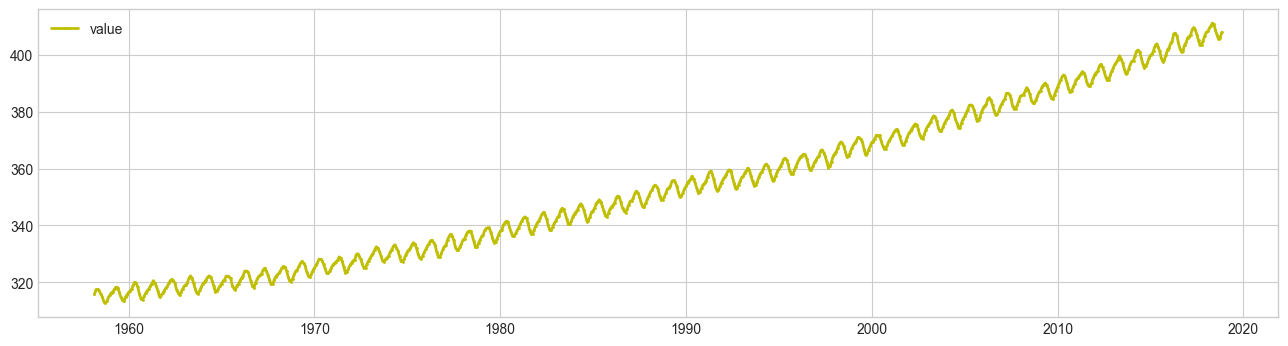

In [517]:
# Visualisation a raw dataset.
plot(df_cardox, ts_linewidth=2, ts_color='y')


In [518]:
# We need max and min values for further finding anomalies.
print(df_cardox.describe())


            value
count  729.000000
mean   353.787229
std     27.547500
min    312.660000
25%    328.570000
50%    351.410000
75%    375.990000
max    411.240000


### Find Anomalies:

[<AxesSubplot: >]

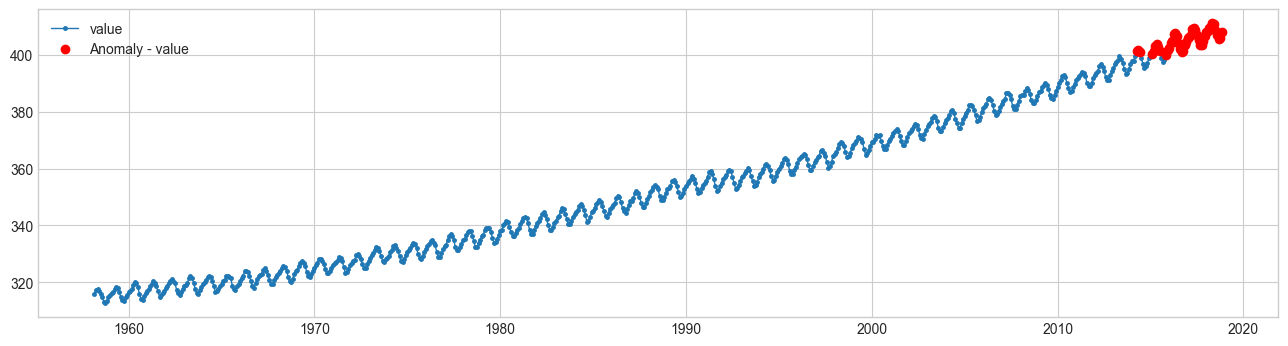

In [519]:
 # Сhecking anomalies with ThresholdAD method.
threshold_ad = ThresholdAD(high=400, low=300) # max and  min values according to previous describe.
anomalies = threshold_ad.detect(df_cardox)

# Visualisation anomalies
plot(df_cardox, anomaly=anomalies, ts_linewidth=1, ts_markersize=5,
     anomaly_markersize=6, anomaly_color='red', anomaly_tag="marker")


In [520]:
# Show years with anomalies.
print(anomalies[anomalies.value])


            value
date             
2014-04-01   True
2014-05-01   True
2014-06-01   True
2015-02-01   True
2015-03-01   True
2015-04-01   True
2015-05-01   True
2015-06-01   True
2015-07-01   True
2015-11-01   True
2015-12-01   True
2016-01-01   True
2016-02-01   True
2016-03-01   True
2016-04-01   True
2016-05-01   True
2016-06-01   True
2016-07-01   True
2016-08-01   True
2016-09-01   True
2016-10-01   True
2016-11-01   True
2016-12-01   True
2017-01-01   True
2017-02-01   True
2017-03-01   True
2017-04-01   True
2017-05-01   True
2017-06-01   True
2017-07-01   True
2017-08-01   True
2017-09-01   True
2017-10-01   True
2017-11-01   True
2017-12-01   True
2018-01-01   True
2018-02-01   True
2018-03-01   True
2018-04-01   True
2018-05-01   True
2018-06-01   True
2018-07-01   True
2018-08-01   True
2018-09-01   True
2018-10-01   True
2018-11-01   True


[<AxesSubplot: >]

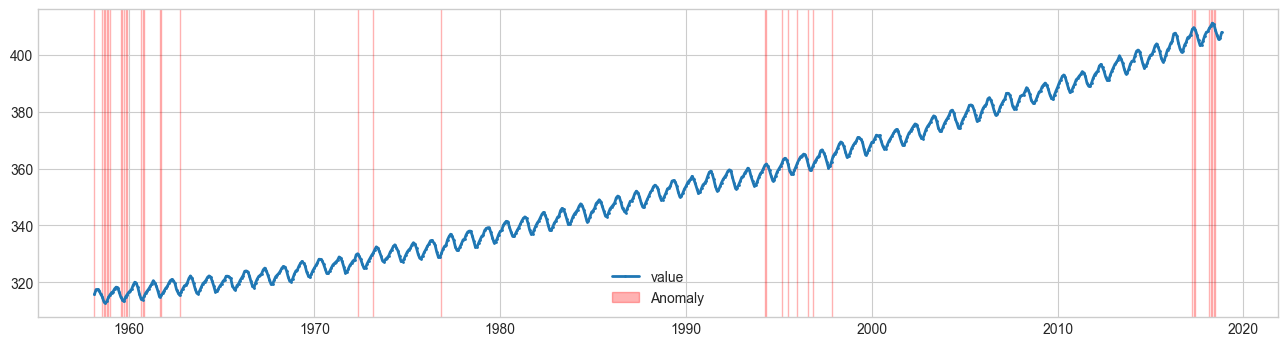

In [521]:
 # Сhecking anomalies with  OutlierDetector method.
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(df_cardox)
plot(df_cardox, anomaly=anomalies, ts_linewidth=2, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')


In [522]:
print(anomalies[anomalies])


date
1958-03-01    True
1958-08-01    True
1958-09-01    True
1958-10-01    True
1958-11-01    True
1958-12-01    True
1959-01-01    True
1959-08-01    True
1959-09-01    True
1959-10-01    True
1959-11-01    True
1959-12-01    True
1960-09-01    True
1960-10-01    True
1960-11-01    True
1961-09-01    True
1961-10-01    True
1962-10-01    True
1972-05-01    True
1973-03-01    True
1976-11-01    True
1994-04-01    True
1994-05-01    True
1995-03-01    True
1995-07-01    True
1996-01-01    True
1996-08-01    True
1996-11-01    True
1997-11-01    True
2017-04-01    True
2017-05-01    True
2017-06-01    True
2018-03-01    True
2018-04-01    True
2018-05-01    True
2018-06-01    True
2018-07-01    True
dtype: bool


### Decomposition

Text(0.5, 0.98, 'Multiplicative model')

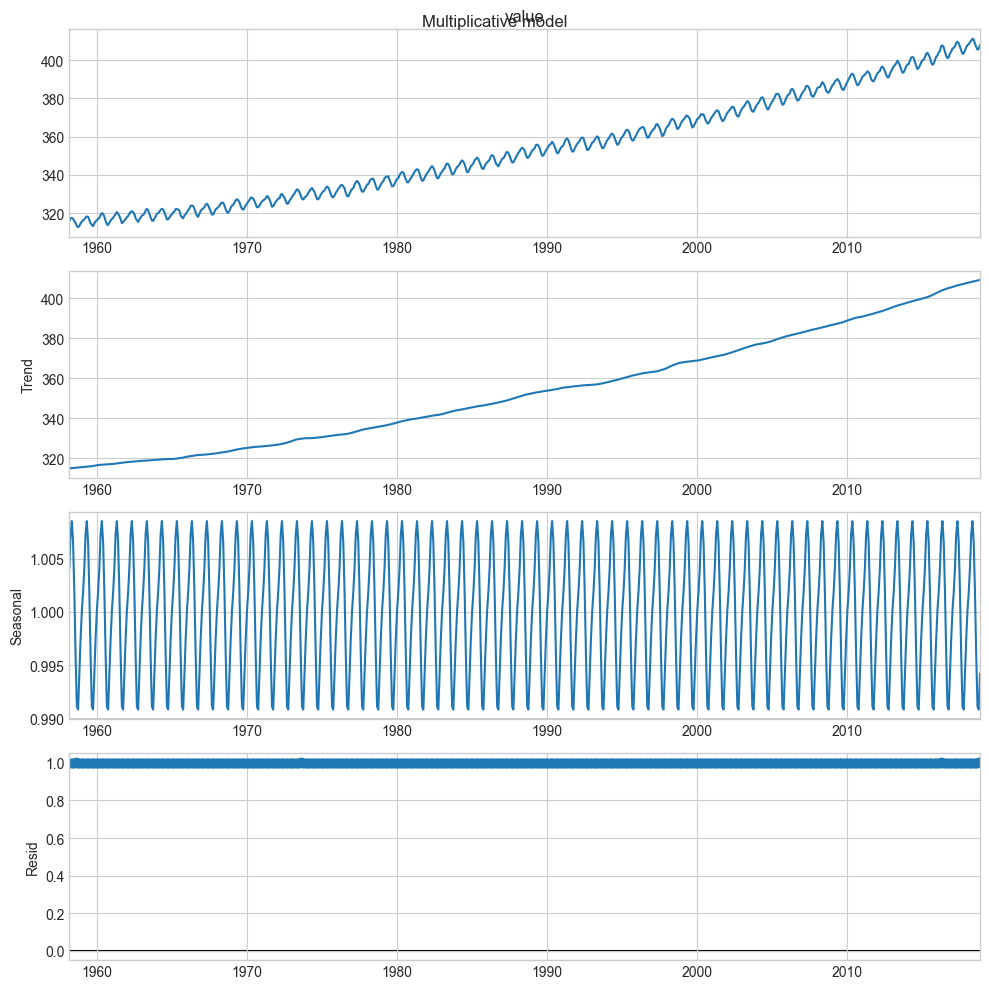

In [523]:
# Making a seasonal decomposition with Multiplicative model.
multi_decom = seasonal_decompose(df_cardox.value, model='multiplicative', extrapolate_trend=12)

# Visualisation decomposition.
plt.rcParams.update({'figure.figsize': (10, 10)})
multi_decom.plot().suptitle('Multiplicative model')


In [524]:
print('Multiplicative Seasonal :')
multi_decom.seasonal['2013']


Multiplicative Seasonal :


date
2013-01-01    1.000135
2013-02-01    1.001929
2013-03-01    1.004054
2013-04-01    1.007302
2013-05-01    1.008530
2013-06-01    1.006555
2013-07-01    1.001988
2013-08-01    0.995917
2013-09-01    0.991096
2013-10-01    0.990812
2013-11-01    0.994200
2013-12-01    0.997482
Name: seasonal, dtype: float64

In [525]:
print('Multiplicative Trend:')
multi_decom.trend['2013']


Multiplicative Trend:


date
2013-01-01    395.357500
2013-02-01    395.597917
2013-03-01    395.812500
2013-04-01    396.020417
2013-05-01    396.221667
2013-06-01    396.416667
2013-07-01    396.616667
2013-08-01    396.762917
2013-09-01    396.910833
2013-10-01    397.132083
2013-11-01    397.339167
2013-12-01    397.532500
Name: trend, dtype: float64

Text(0.5, 0.98, 'Additive model')

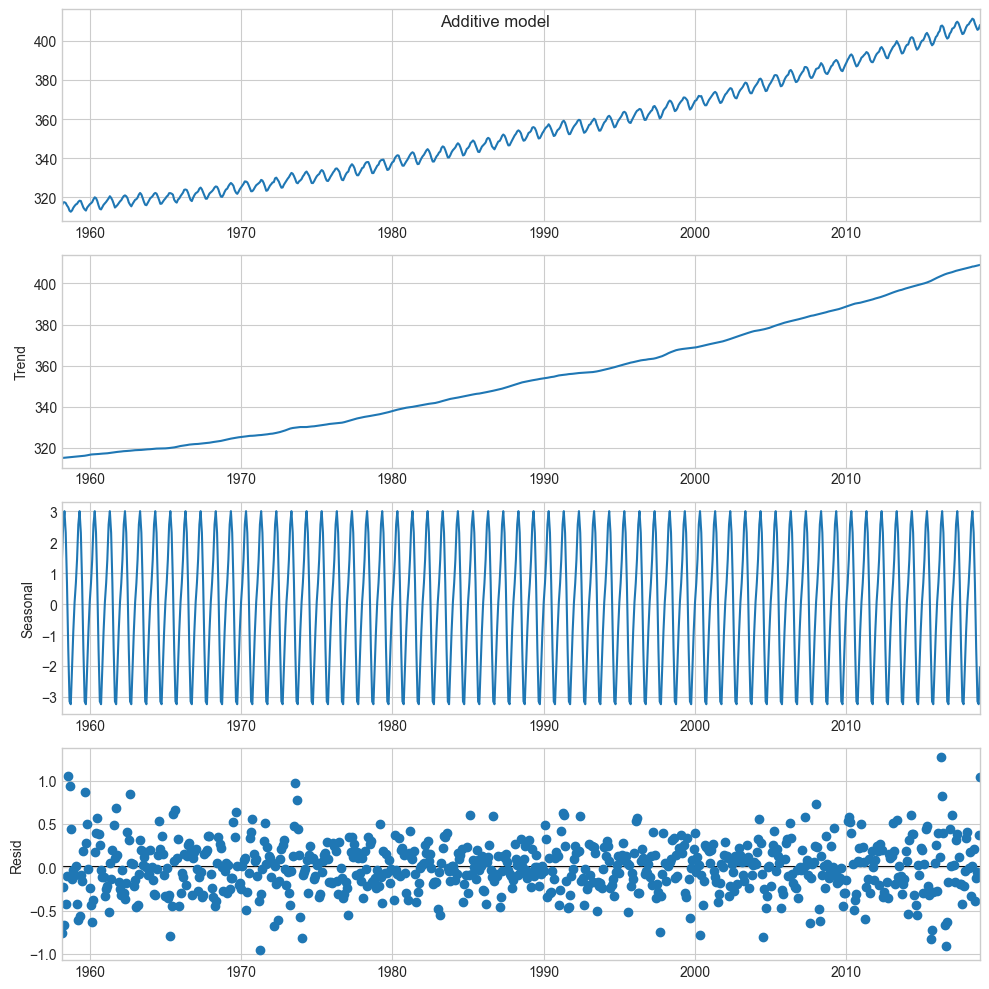

In [526]:
# Making a seasonal decomposition with Additive model.
addit_decom = seasonal_decompose(df_cardox, model='additive', extrapolate_trend=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
addit_decom.plot().suptitle('Additive model')


In [527]:
print('Additive Seasonal:')
addit_decom.seasonal['2013']


Additive Seasonal:


date
2013-01-01    0.059289
2013-02-01    0.688213
2013-03-01    1.435042
2013-04-01    2.579879
2013-05-01    3.010959
2013-06-01    2.308198
2013-07-01    0.687431
2013-08-01   -1.456150
2013-09-01   -3.152087
2013-10-01   -3.241776
2013-11-01   -2.041328
2013-12-01   -0.877669
Name: seasonal, dtype: float64

In [528]:
print('Additive Trend:')
addit_decom.trend['2013']


Additive Trend:


date
2013-01-01    395.357500
2013-02-01    395.597917
2013-03-01    395.812500
2013-04-01    396.020417
2013-05-01    396.221667
2013-06-01    396.416667
2013-07-01    396.616667
2013-08-01    396.762917
2013-09-01    396.910833
2013-10-01    397.132083
2013-11-01    397.339167
2013-12-01    397.532500
Name: trend, dtype: float64

### Seasonal adjustment

In [529]:
# Data for adjustment.
df_cardox.loc['2018-01-01']=df_cardox.loc['2017-01-01']
df_cardox.loc['2018-02-01']=df_cardox.loc['2017-02-01']
df_cardox.loc['2018-03-01']=df_cardox.loc['2017-03-01']
df_cardox.loc['2018-04-01']=df_cardox.loc['2017-04-01']
df_cardox.loc['2018-05-01']=df_cardox.loc['2017-05-01']
df_cardox.loc['2018-06-01']=df_cardox.loc['2017-06-01']
df_cardox.loc['2018-07-01']=df_cardox.loc['2017-07-01']


In [530]:
# Split data to a train
train = df_cardox['2012':'2016']
train.head()


,value
date,
2012-01-01,393.12
2012-02-01,393.86
2012-03-01,394.40
2012-04-01,396.18
2012-05-01,396.74


In [531]:
test = df_cardox['2016']
test.head()


,value
date,
2016-01-01,402.56
2016-02-01,404.12
2016-03-01,404.87
2016-04-01,407.45
2016-05-01,407.72


In [532]:
from statsmodels.tsa.arima.model import ARIMA

# Make an ARIMA model.
arima_model = ARIMA(df_cardox.value, order=(1, 1, 2))
arima_model_fit = arima_model.fit()
print('\nResult by ARIMA model:')
print(arima_model_fit.summary().tables[1])




Result by ARIMA model:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4068      0.062      6.563      0.000       0.285       0.528
ma.L1          0.5191      0.060      8.695      0.000       0.402       0.636
ma.L2          0.3826      0.049      7.809      0.000       0.287       0.479
sigma2         0.6244      0.037     16.995      0.000       0.552       0.696


In [533]:
# Parameters of model.
print(arima_model_fit.params)


ar.L1     0.406810
ma.L1     0.519072
ma.L2     0.382577
sigma2    0.624420
dtype: float64


In [534]:
# Computation accuracy Mertrics.
print(arima_model_fit.fittedvalues)


date
1958-03-01      0.000000
1958-04-01    315.710376
1958-05-01    318.754155
1958-06-01    317.122687
1958-07-01    316.496367
                 ...    
2018-07-01    407.781767
2018-08-01    405.681073
2018-09-01    407.363365
2018-10-01    404.446657
2018-11-01    406.296579
Length: 729, dtype: float64


In [535]:
# Prediction Value for the next 30 years (2018–2030).
pred_model = arima_model_fit.predict(2018, 2048)
print('\nPrediction by ARIMA model:')
print(pred_model)



Prediction by ARIMA model:
2126-05-01    413.026737
2126-06-01    413.026737
2126-07-01    413.026737
2126-08-01    413.026737
2126-09-01    413.026737
2126-10-01    413.026737
2126-11-01    413.026737
2126-12-01    413.026737
2127-01-01    413.026737
2127-02-01    413.026737
2127-03-01    413.026737
2127-04-01    413.026737
2127-05-01    413.026737
2127-06-01    413.026737
2127-07-01    413.026737
2127-08-01    413.026737
2127-09-01    413.026737
2127-10-01    413.026737
2127-11-01    413.026737
2127-12-01    413.026737
2128-01-01    413.026737
2128-02-01    413.026737
2128-03-01    413.026737
2128-04-01    413.026737
2128-05-01    413.026737
2128-06-01    413.026737
2128-07-01    413.026737
2128-08-01    413.026737
2128-09-01    413.026737
2128-10-01    413.026737
2128-11-01    413.026737
Freq: MS, Name: predicted_mean, dtype: float64


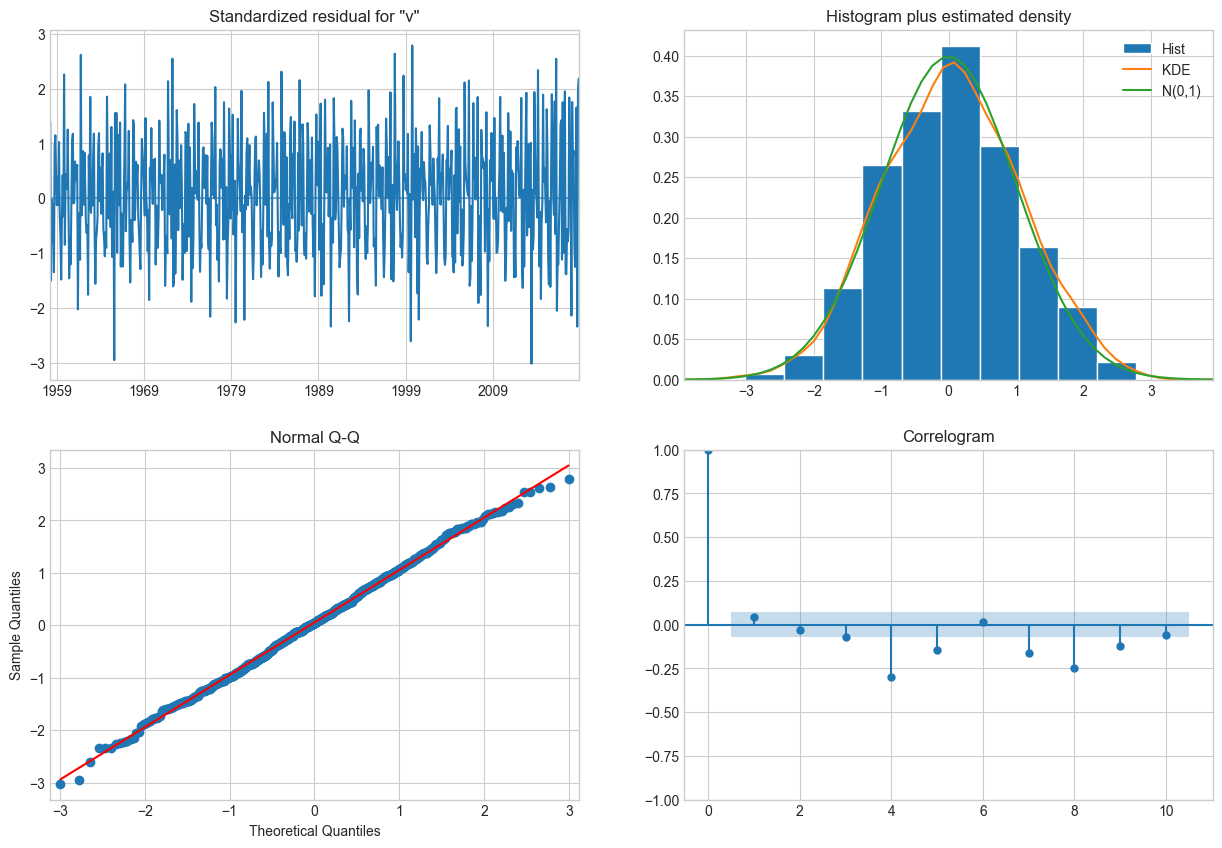

In [536]:
# Visualisation ARIMA model.
arima_model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()


In [537]:
# Saving result.
pred_model.to_csv('forecast_result.csv')
